In [18]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [19]:
# Read csv

csv_path = "../Clean_data/car_data.csv"
car_data_df = pd.read_csv(csv_path)

car_data_df


,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...
30493,2018,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700.0,NaN,Car,3920.0,Yes,Yes,Yes
30494,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,28.0,Car,3602.0,Yes,No,Yes
30495,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,28.0,Car,3602.0,Yes,Yes,Yes
30496,2015,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,28.0,Car,3602.0,Yes,No,Yes


In [20]:
# Group by body style and year & grab Retail Price

grouped_df = car_data_df.groupby(["Body Style", "Year"]).mean()["Retail Price"]
grouped_df = pd.DataFrame(grouped_df).reset_index()

grouped_df

,Body Style,Year,Retail Price
0,Car,1996,27925.186544
1,Car,1997,28097.921833
2,Car,1998,27755.932615
3,Car,1999,27577.415233
4,Car,2000,28482.681395
...,...,...,...
64,Van,2014,32097.559524
65,Van,2015,33122.941176
66,Van,2016,33639.392523
67,Van,2018,35936.954023


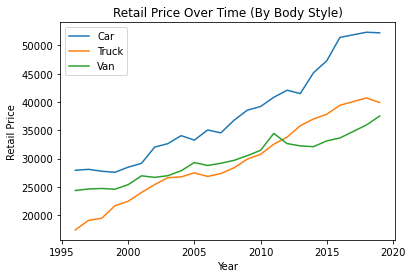

In [21]:
# Line plot for data (use a loop for each body style)

body_styles = grouped_df["Body Style"].unique()

for x in body_styles:
    styles_df = grouped_df[grouped_df["Body Style"] == x]
    plt.plot(styles_df["Year"], styles_df["Retail Price"], label = x)

plt.xlabel("Year")
plt.ylabel("Retail Price")
plt.title("Retail Price Over Time (By Body Style)")
plt.legend()
plt.savefig("../output_images/Retail Price Over Time",dpi=200)
plt.show()

In [22]:
##  Part Two : Correlation between price & weight (Scatterplot)
# Need to drop outliers in base weight column

outlier_df = car_data_df[(car_data_df['Year'] == 1997) & (car_data_df['Body Style']=='Car')]
outlier_values_df = outlier_df[outlier_df['Base Curb Weight (lbs)'] > 10000]

dropped_df1 = pd.concat([car_data_df, outlier_values_df, outlier_values_df]).drop_duplicates(keep=False)


outlier_df2 = car_data_df[(car_data_df["Year"] == 2011) & (car_data_df["Body Style"] == "Car")]
outlier_values_df2 = outlier_df2[outlier_df2["Base Curb Weight (lbs)"] > 10000]

dropped_df2 = pd.concat([dropped_df1, outlier_values_df2, outlier_values_df2]).drop_duplicates(keep=False)

dropped_df2


,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...
30493,2018,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700.0,NaN,Car,3920.0,Yes,Yes,Yes
30494,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,28.0,Car,3602.0,Yes,No,Yes
30495,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,28.0,Car,3602.0,Yes,Yes,Yes
30496,2015,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,28.0,Car,3602.0,Yes,No,Yes


In [23]:
# Create a new DataFrame that grabs weight column & retail price

scatter_df = dropped_df2.groupby(["Body Style", "Year"]).mean()[["Retail Price", "Base Curb Weight (lbs)"]].reset_index()

scatter_df

,Body Style,Year,Retail Price,Base Curb Weight (lbs)
0,Car,1996,27925.186544,3351.472727
1,Car,1997,28538.898592,3173.063694
2,Car,1998,27755.932615,3191.718571
3,Car,1999,27577.415233,3216.417582
4,Car,2000,28482.681395,3265.072776
...,...,...,...,...
64,Van,2014,32097.559524,4332.411765
65,Van,2015,33122.941176,4344.146341
66,Van,2016,33639.392523,4353.833333
67,Van,2018,35936.954023,4391.708333


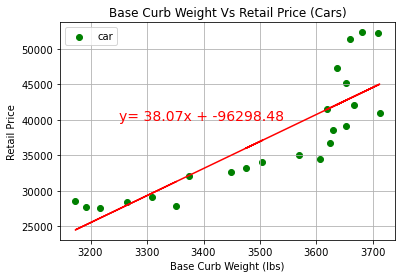

The correlation between Base Curb Weight and Retail Price of Cars is 0.84
The r-squared value is: 0.7139, 


In [25]:
#  Find Correlation coefficient and linear regression
# Create scatterplots between price & weight (Scatterplot)

car_df = scatter_df[(scatter_df["Body Style"] == "Car")]

car_weight = car_df.iloc[:, 3]
car_retail_price = car_df.iloc[:, 2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(car_weight, car_retail_price)
regress_values = car_weight * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(car_weight, car_retail_price, color="green", label="car")
plt.plot(car_weight, regress_values, "r-")
plt.xlabel("Base Curb Weight (lbs)")
plt.ylabel("Retail Price")
plt.title("Base Curb Weight Vs Retail Price (Cars)")
plt.annotate(line_eq, (3250, 40000), fontsize=14, color="red")
plt.grid()
plt.legend()
plt.savefig("../output_images/Car Weight Vs Price.png",dpi=200)
plt.show()

# Correlation Coefficient - Use Pearson correlation coefficient

correlation = st.pearsonr(car_weight, car_retail_price)
print(f"The correlation between Base Curb Weight and Retail Price of Cars is {round(correlation[0],2)}")
print(f"The r-squared value is: {rvalue**2:.4f}, ")




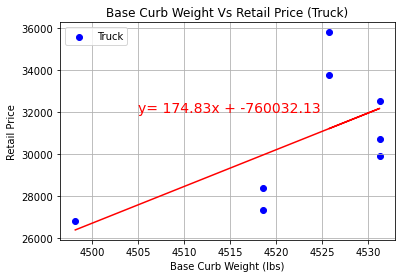

The correlation between Base Curb Weight and Retail Price of Trucks is 0.61
The r-squared value is: 0.3755, 


In [26]:
# Do the same for trucks - Need to drop Naan Values first

truck_df = scatter_df[(scatter_df["Body Style"] == "Truck")]
truck_df = truck_df.dropna(subset=["Base Curb Weight (lbs)"])

truck_weight = truck_df.iloc[:, 3]
truck_retail_price = truck_df.iloc[:, 2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(truck_weight, truck_retail_price)
regress_values = truck_weight * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(truck_weight, truck_retail_price, color="blue", label="Truck")
plt.plot(truck_weight, regress_values, "r-")
plt.xlabel("Base Curb Weight (lbs)")
plt.ylabel("Retail Price")
plt.title("Base Curb Weight Vs Retail Price (Truck)")
plt.annotate(line_eq, (4505, 32000), fontsize=14, color="red")
plt.grid()
plt.legend()
plt.savefig("../output_images/Truck Weight Vs Price.png",dpi=200)
plt.show()

# Correlation Coefficient - Use Pearson correlation coefficient

correlation = st.pearsonr(truck_weight, truck_retail_price)
print(f"The correlation between Base Curb Weight and Retail Price of Trucks is {round(correlation[0],2)}")
print(f"The r-squared value is: {rvalue**2:.4f}, ")



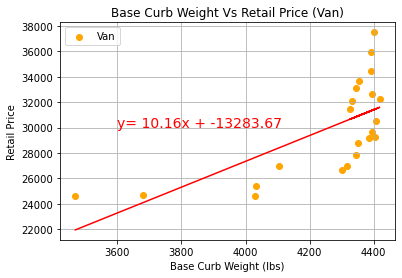

The correlation between Base Curb Weight and Retail Price of Vans is 0.67
The r-squared value is: 0.4543, 


In [27]:
# Same for Vans - Need to drop Naan Values first

van_df = scatter_df[(scatter_df["Body Style"] == "Van")]
van_df = van_df.dropna(subset=["Base Curb Weight (lbs)"])

van_weight = van_df.iloc[:, 3]
van_retail_price = van_df.iloc[:, 2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(van_weight, van_retail_price)
regress_values = van_weight * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(van_weight, van_retail_price, color="orange", label="Van")
plt.plot(van_weight, regress_values, "r-")
plt.xlabel("Base Curb Weight (lbs)")
plt.ylabel("Retail Price")
plt.title("Base Curb Weight Vs Retail Price (Van)")
plt.annotate(line_eq, (3600, 30000), fontsize=14, color="red")
plt.grid()
plt.legend()
plt.savefig("../output_images/Van Weight Vs Price.png",dpi=200)
plt.show()

# Correlation Coefficient & r-square value - Use Pearson correlation coefficient

correlation = st.pearsonr(van_weight, van_retail_price)
print(f"The correlation between Base Curb Weight and Retail Price of Vans is {round(correlation[0],2)}")
print(f"The r-squared value is: {rvalue**2:.4f}, ")


